## Rainfall Prediction - Weather Forecasting

In [61]:
# Importing Laibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [62]:
# Loading Dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



## Exploratory Data Analysis (EDA)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [64]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [65]:
#checking datatypes
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [66]:
#checking the null values
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Except for the Date, Location columns, every column has missing values. We need to handle all these columns

In [67]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [68]:
# checking numeric columns
df._get_numeric_data().columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [69]:
df.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [70]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [71]:
#Separating the date column in year, month and day column
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [72]:
#After separating drop the date column
df.drop('Date', axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [73]:
## Handling numeric missing values

In [74]:
# for temprature replacing NaN with its respective mode value 
df['MinTemp'].fillna(value=df['MinTemp'].mode()[0],inplace=True )
df['MaxTemp'].fillna(value=df['MaxTemp'].mode()[0],inplace=True )
df['Temp9am'].fillna(value=df['Temp9am'].mode()[0],inplace=True )
df['Temp3pm'].fillna(value=df['Temp3pm'].mode()[0],inplace=True )
df['Humidity9am'].fillna(value=df['Humidity9am'].mode()[0],inplace=True )
df['Humidity3pm'].fillna(value=df['Humidity3pm'].mode()[0],inplace=True )
df['Pressure9am'].fillna(value=df['Pressure9am'].mode()[0],inplace=True )
df['Pressure3pm'].fillna(value=df['Pressure3pm'].mode()[0],inplace=True )

In [75]:
df['Rainfall']=df['Rainfall'].replace(np.NaN, df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].replace(np.NaN, df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].replace(np.NaN, df['Sunshine'].mean())

In [76]:
df['WindGustSpeed'].fillna(value=df['WindGustSpeed'].median(),inplace=True)
df['WindSpeed9am'].fillna(value=df['WindSpeed9am'].median(),inplace=True)
df['WindSpeed3pm'].fillna(value=df['WindSpeed3pm'].median(),inplace=True)
df['Cloud9am'].fillna(value=df['Cloud9am'].median(),inplace=True)
df['Cloud3pm'].fillna(value=df['Cloud3pm'].median(),inplace=True)


In [77]:
#Handle Categorical missing values
for i in ('WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday','RainTomorrow'):
    print(df[i].value_counts()[df[i].value_counts() == df[i].value_counts().max()],'\n')
    print('********************')

N    713
Name: WindGustDir, dtype: int64 

********************
N    906
Name: WindDir9am, dtype: int64 

********************
SE    813
Name: WindDir3pm, dtype: int64 

********************
No    6195
Name: RainToday, dtype: int64 

********************
No    6195
Name: RainTomorrow, dtype: int64 

********************


In [78]:
df['WindGustDir']=df['WindGustDir'].fillna('N')
df['WindDir9am']=df['WindDir9am'].fillna('N')
df['WindDir3pm']=df['WindDir3pm'].fillna('SE')
df['RainToday']=df['RainToday'].fillna('No')
df['RainTomorrow']=df['RainTomorrow'].fillna('No')

In [79]:
#after handling null values
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

### Visualization

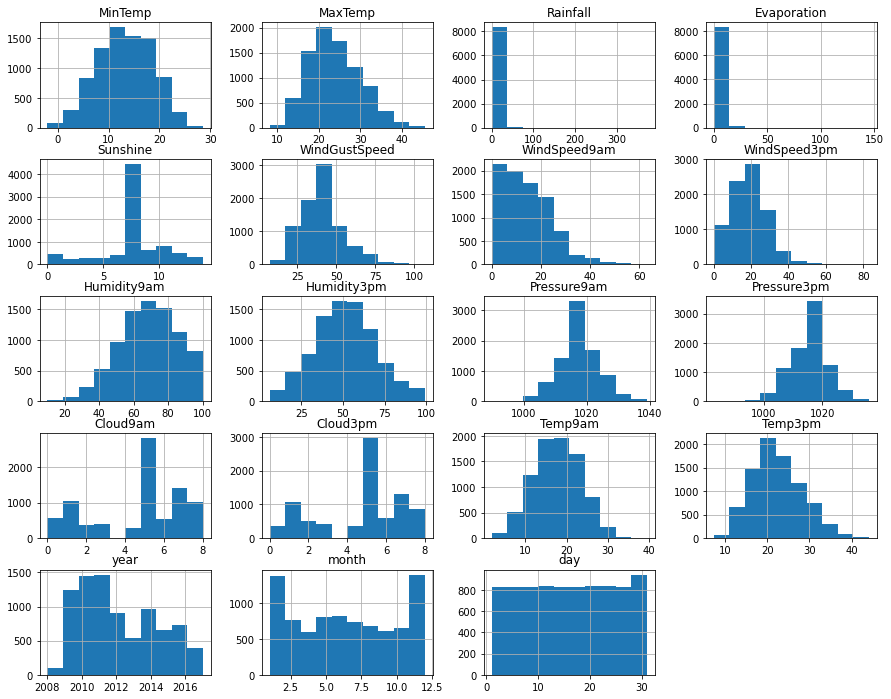

In [80]:
# Visualization For numerical data
df.hist(figsize=(15,12), layout=(5,4), sharex=False);

In [81]:
df.select_dtypes(include=['object']).columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64


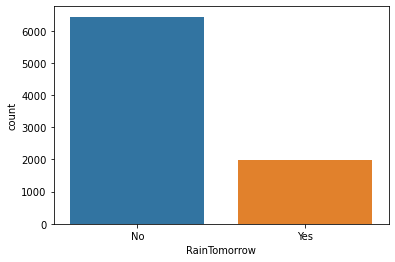

In [82]:
#For categorical data
ax = sns.countplot (x = "RainTomorrow", data = df)
print(df["RainTomorrow"].value_counts())

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


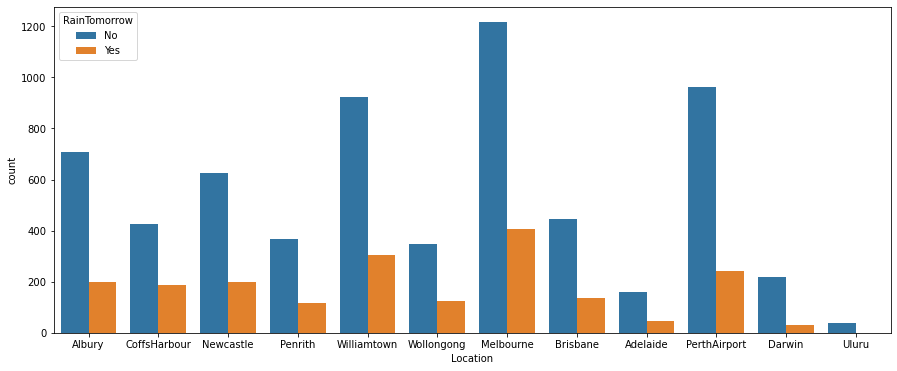

In [83]:
fig = plt.figure(figsize=(15,6))
ax = sns.countplot (x = "Location", hue = "RainTomorrow", data = df)
print(df["Location"].value_counts())

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64


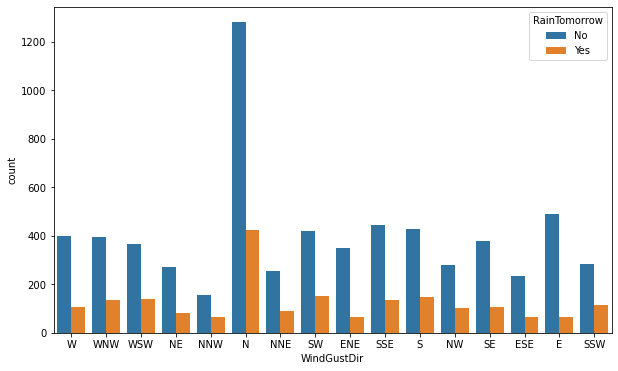

In [84]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot (x = "WindGustDir", hue = "RainTomorrow", data = df)
print(df["WindGustDir"].value_counts())

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


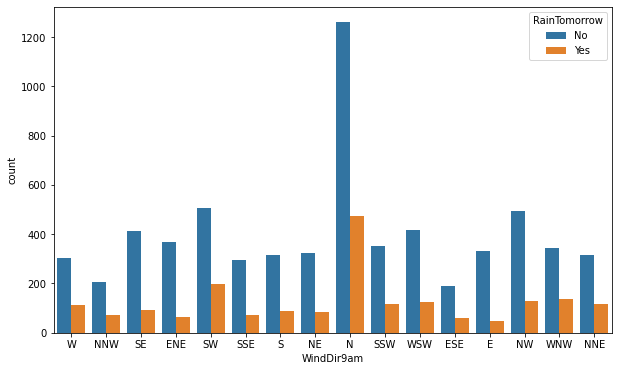

In [85]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot (x = "WindDir9am", hue = "RainTomorrow", data = df)
print(df["WindDir9am"].value_counts())

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
ESE     462
W       462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64


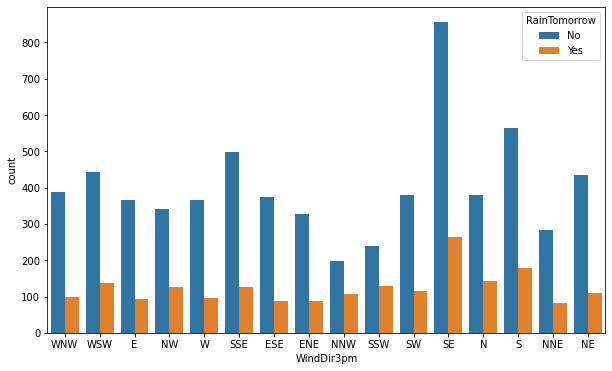

In [86]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot (x = "WindDir3pm", hue = "RainTomorrow", data = df)
print(df["WindDir3pm"].value_counts())

No     6435
Yes    1990
Name: RainToday, dtype: int64


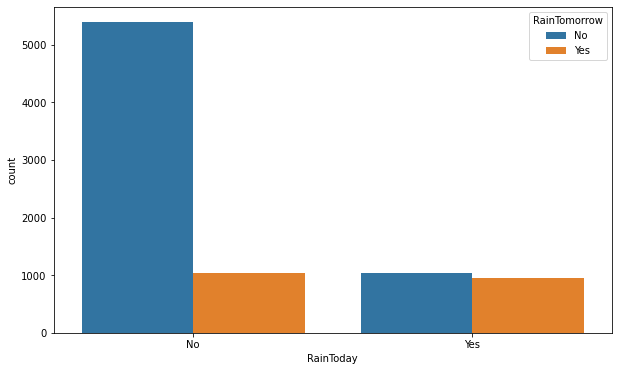

In [87]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot (x = "RainToday", hue = "RainTomorrow", data = df)
print(df["RainToday"].value_counts())

## Encoding of Dataframe:

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ('Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'):
    df[i] = le.fit_transform(df[i])

In [89]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,...,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,...,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,...,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,...,1012.8,5.0,5.0,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.4,0.0,5.389395,7.632205,0,31.0,9,1,...,1020.3,5.0,5.0,10.1,22.4,0,0,2017,6,21
8421,9,3.6,25.3,0.0,5.389395,7.632205,6,22.0,9,3,...,1019.1,5.0,5.0,10.9,24.5,0,0,2017,6,22
8422,9,5.4,26.9,0.0,5.389395,7.632205,3,37.0,9,14,...,1016.8,5.0,5.0,12.5,26.1,0,0,2017,6,23
8423,9,7.8,27.0,0.0,5.389395,7.632205,9,28.0,10,3,...,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6,24


In [90]:
# Checking corelation
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
Location,1.000000,0.116244,0.063727,0.007693,0.143519,0.057817,-0.035408,0.230018,-0.027103,-0.027736,...,-0.009161,0.037747,0.015868,0.117040,0.059716,0.003071,0.002824,0.486405,-0.082407,-0.002019
MinTemp,0.116244,1.000000,0.716554,0.087022,0.254913,0.056103,-0.143821,0.230313,-0.040171,-0.147337,...,-0.428689,0.078357,0.022112,0.886777,0.687180,0.065191,0.092657,0.043248,-0.245593,0.009422
MaxTemp,0.063727,0.716554,1.000000,-0.086622,0.321706,0.377330,-0.219104,0.139978,-0.210728,-0.180844,...,-0.402141,-0.254793,-0.253004,0.864741,0.973412,-0.222793,-0.150733,0.116846,-0.161232,0.016050
Rainfall,0.007693,0.087022,-0.086622,1.000000,0.023517,-0.169432,0.038812,0.085264,0.093821,0.038560,...,-0.033257,0.178932,0.143365,-0.007064,-0.090083,0.461106,0.220021,0.006435,-0.012244,-0.013760
Evaporation,0.143519,0.254913,0.321706,0.023517,1.000000,0.226001,-0.078765,0.135438,-0.061677,-0.047952,...,-0.187482,-0.061732,-0.105846,0.305015,0.314611,-0.088654,-0.059012,0.152708,0.004362,0.013597
Sunshine,0.057817,0.056103,0.377330,-0.169432,0.226001,1.000000,-0.105918,-0.013973,-0.076560,-0.068553,...,-0.035387,-0.535092,-0.549008,0.250664,0.394623,-0.234230,-0.327731,0.065374,-0.006694,0.004662
WindGustDir,-0.035408,-0.143821,-0.219104,0.038812,-0.078765,-0.105918,1.000000,0.025577,0.403562,0.505799,...,-0.058467,0.133499,0.102306,-0.173622,-0.233015,0.125188,0.051832,-0.088340,0.034823,0.015683
WindGustSpeed,0.230018,0.230313,0.139978,0.085264,0.135438,-0.013973,0.025577,1.000000,-0.068545,0.070677,...,-0.385564,0.019763,0.070237,0.202291,0.102218,0.076890,0.190274,-0.049612,0.051063,-0.002454
WindDir9am,-0.027103,-0.040171,-0.210728,0.093821,-0.061677,-0.076560,0.403562,-0.068545,1.000000,0.249527,...,0.052802,0.100780,0.064874,-0.099944,-0.217929,0.157324,0.032860,-0.014498,0.012544,-0.015154
WindDir3pm,-0.027736,-0.147337,-0.180844,0.038560,-0.047952,-0.068553,0.505799,0.070677,0.249527,1.000000,...,-0.042155,0.078786,0.056744,-0.165367,-0.195979,0.100125,0.008918,-0.005812,0.029384,0.003089


<AxesSubplot:>

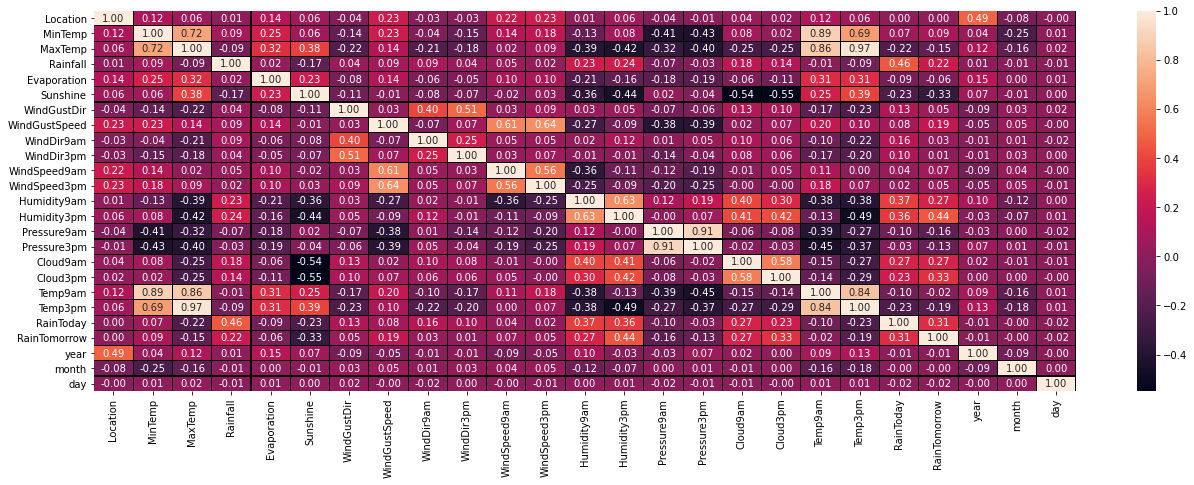

In [91]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor="black", fmt="0.2f")

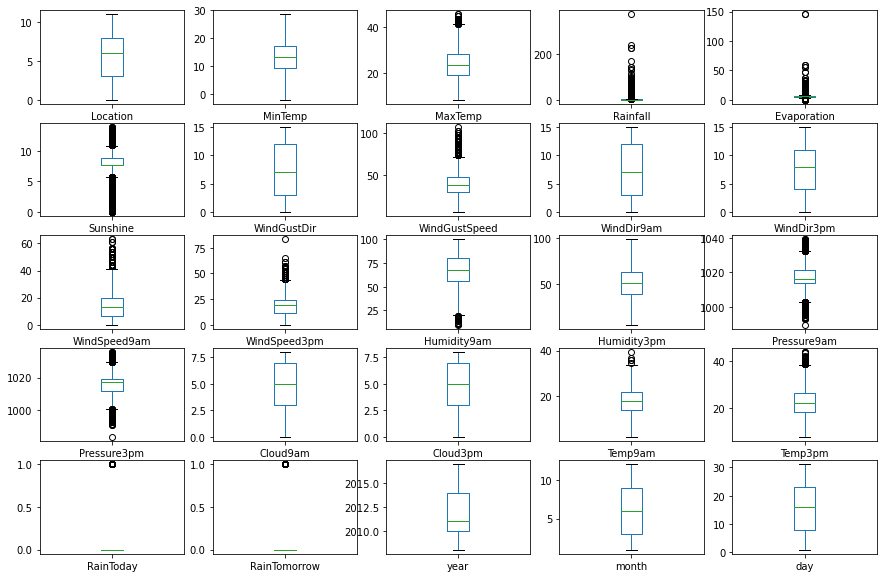

In [92]:
# Outliers Checking
df.plot(kind='box', subplots = True, layout=(5,5), figsize=(15,10));

In [93]:
df.shape

(8425, 25)

In [94]:
# Considering the outlier removal
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z<3)

(array([   0,    0,    0, ..., 8424, 8424, 8424], dtype=int64),
 array([ 0,  1,  2, ..., 22, 23, 24], dtype=int64))

In [95]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,...,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,...,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,...,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,...,1012.8,5.0,5.0,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.4,0.0,5.389395,7.632205,0,31.0,9,1,...,1020.3,5.0,5.0,10.1,22.4,0,0,2017,6,21
8421,9,3.6,25.3,0.0,5.389395,7.632205,6,22.0,9,3,...,1019.1,5.0,5.0,10.9,24.5,0,0,2017,6,22
8422,9,5.4,26.9,0.0,5.389395,7.632205,3,37.0,9,14,...,1016.8,5.0,5.0,12.5,26.1,0,0,2017,6,23
8423,9,7.8,27.0,0.0,5.389395,7.632205,9,28.0,10,3,...,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6,24


In [96]:
df_new_z.shape

(7988, 25)

In [97]:
#Percentage loss of data:
Data_loss=((8425 - 7988)/8425)*100
Data_loss

5.186943620178042

data loss is only 5 percent so, we can remove the outliers

In [98]:
df=df_new_z

In [99]:
# Seperating Independent Variables and Dependent Variables(Target Variables)
X=df.drop(['RainTomorrow'], axis=1)
y=df['RainTomorrow']

#### Model Building

In [106]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_logreg = LogisticRegression(random_state=0)
clf_logreg.fit(X_train,y_train)
y_pred = clf_logreg.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.8382573860791187
Time taken : 0.17077183723449707


In [107]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
clf_rf.fit(X_train,y_train)
y_pred = clf_rf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.8362543815723585
Time taken : 0.5270495414733887


In [108]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.8362543815723585
Time taken : 0.10993003845214844


In [109]:
#Support Vector Machine
from sklearn import svm
from sklearn.model_selection import train_test_split

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_svc = svm.SVC(kernel='linear')
clf_svc.fit(X_train,y_train)
y_pred = clf_svc.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.8337506259389084
Time taken : 7.318356037139893


We are getting 83% accuracy which is good

In [110]:
import pickle
filename = 'rainfall.pkl'
pickle.dump(clf_logreg,open(filename,'wb'))

In [111]:
#Loading Model:
loaded_model=pickle.load(open('rainfall.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(result)

0.8392588883324987


In [59]:
#conclusion
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],y_pred[:]],index=["Predicted","Orginal"])

In [60]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996
Predicted,0,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,1,0
Orginal,0,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,1,0
